# N-slits diffraction pattern

In [ ]:
%%html
<script>
window.MathJax = {
tex: {
  inlineMath: [['$', '$']],  // habilita $...$
  displayMath: [['$$', '$$']]
},
svg: { fontCache: 'global' }
};
var script = document.createElement("script");
script.src = "https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js";
script.async = true;
document.head.appendChild(script);
</script>

The interactive figure below illustrates the light intensity on screen when a monochromic light source passes through an n-slit grating, where $n$ is the number of slit, $d$ is the spacing between slits, $a$ is the width of the slit. The screen is placed at $L$ = 2 m behind the slits, and the marker in the figure is measured in cm.

Mathematically, the intensity of light on the screen is given by:

$$ I(\theta) = I_\textrm{max} \ f_a(\theta)^2 \ g_{n, d}(\theta)^2$$

where:

$$
\begin{align}
f_a(x) & = \frac{\sin(\pi a \sin{\theta}/\lambda)}{\pi a \sin\theta / \lambda}\\
& \\
g_{n, d}(x)& = \frac{\sin(n\pi d \sin\theta / \lambda)}{n \sin(\pi d \sin\theta / \lambda)}
\end{align}
$$

with $x = L \tan\theta \approx L \theta$

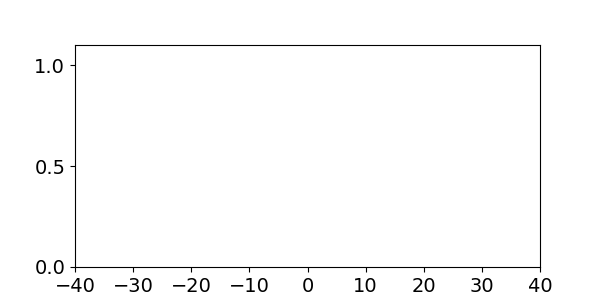

interactive(children=(IntSlider(value=2, description='n', max=8, min=2), FloatSlider(value=1e-06, description=…

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


def build_plot_area(
    xclip, yclip, xjump, yjump, xrange=None, yrange=None, 
    xorigin=0, yorigin=0, xlabels=None, ylabels=None, *, 
    frame=True, grid=True, xaxis=None, yaxis=None,
    fontsize=14, linewidth=1, eps=1.0E-5, ax=None, **kwargs
):
    '''
    build a basic plot area with x and y axis, complete with ticks, grids,
    and possibly solid lines on x- and y- axes
    
    Arguments:
     - xclip: the range in x (horizontal) coordinates for which the plot
        area is shown. Can be list of numerical value. In the latter case
        the second bound is assumed to be 0
     - yclip: the range in x (vertical) coordinates for which the plot
        area is shown. Can be list of numerical value. In the latter case
        the second bound is assumed to be 0
     - xjump: the interval between ticks for the x axis. If a single value
        only major ticks are shown. If a 2-list or 2-tuple, the zeroth (first)
        value corresponds to major (minor) tick interval. If None use 
        matplotlib's default
     - yjump: the interval between ticks for the y axis. Use the same 
        convention as xjump
     - xrange: the range for which ticks starts and ends for the x axis.
        If a single number the other end is assumed to be 0; if None uses
        the xclip values for this purpose
     - yrange: the range for which ticks starts and ends for the y axis.
        Use the same convention as xrange
     - xorigin: the x-coordinate of the vertical axis.
     - yorigin: the y-coordinate of the horizontal axis.
     - xlabels: ticks labels for x axis. If None use matplotlib's default
     - ylabels: ticks labels for y axis. If None use matplotlib's default
     
    Keyword-only arguments:
     - frame: whether to draw a bounding frame
     - grid: whether to draw a grid consisting of broken lines
     - xaxis: whether to draw a solid line for x axis. If None, default
         to False in frame mode (frame=True) and True otherwise
     - yaxis: whether to draw a solid line for y axis. If None, default
         to False in frame mode (frame=True) and True otherwise
     - fontsize: fontsize for ticks labels
     - linewidth: line widths for grid and axes
     - eps: internal small value added to upper value of yrange to make
        it inclusive of the upper value
     - ax: if None, a new figure with a single axes object is created. 
        Otherwise, the axes object for which the plot area is created for
     - **kwargs: remaining keyword arguments are passed to the subplots()
        function called to construct the plot area. Ignore if `ax` is not None
    
    Returns: If ax is not None, the figure and axes object of the plot area 
    (for further additions and manipulations). Other wise, the axes object for 
    which the plot area has been modified
    '''
    if ax is None:
        fig, ax = plt.subplots(**kwargs)
    else:
        fig = None
    
    if xrange is None: 
        xrange = xclip
        
    if yrange is None:
        yrange = yclip
    
    for _i, _var in enumerate([xrange, yrange, xclip, yclip]):
    
        try:
            _l = len(_var)
        except TypeError:
            _var = sorted([0, _var])
        else:
            if _l==1:
                _var = sorted([0, _var])
            else:
                _var = sorted(_var)
        
        if _i==0:
            xrange = _var
        elif _i==1:
            yrange = _var
        elif _i==2:
            xclip = _var
        else:
            yclip = _var
            
    ax.set_xlim(xclip[0], xclip[1]) 
    ax.set_ylim(yclip[0], yclip[1])
    
    if grid:
        ax.grid(linestyle='--', lw=linewidth)    
        
    if frame:       
        if xaxis:
            ax.axhline(y=yorigin, c='k', lw=linewidth)
        if yaxis:
            ax.axvline(x=xorigin, c='k', lw=linewidth)
    
    else:
        xaxis = True if (xaxis is None) else xaxis
        yaxis = True if (yaxis is None) else xaxis
        
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)

        if yaxis:
            ax.spines.bottom.set_position(("data", yorigin))
            ax.yaxis.set_ticks_position("left")
        else:
            ax.spines.bottom.set_visible(False)

        if xaxis:
            ax.spines.left.set_position(("data", xorigin))
            ax.xaxis.set_ticks_position("bottom")
        else:
            ax.spines.left.set_visible(False)            
    
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    
    for (_range, _jump, _setter, _labels) in zip(
        [xrange, yrange], [xjump, yjump], 
        [ax.set_xticks, ax.set_yticks], [xlabels, ylabels]
    ):
    
        try: 
            _l = len(_jump)
        except TypeError:
            if _jump is not None:
                if _labels is None:
                    _setter(np.arange(_range[0], _range[1]+eps, _jump))
                else:
                    _setter(np.arange(_range[0], _range[1]+eps, _jump), _labels)
        else: # else of except
            if _labels is None:
                _setter(np.arange(_range[0], _range[1]+eps, _jump[0]))
                _setter(np.arange(_range[0], _range[1]+eps, _jump[1]), minor=True)    
            else:
                _setter(np.arange(_range[0], _range[1]+eps, _jump[0]), _labels)
                _setter(np.arange(_range[0], _range[1]+eps, _jump[1]), minor=True)    
    
    if fig is None:
        return ax
    else:
        return fig, ax


def I_Nslit_full_setup(n, L, lamda, d, a, norm=True, eps=1e-5):
    d_btm_factor = np.pi * d / lamda
    d_top_factor = n * np.pi * d / lamda
    N_factor = 1 if norm else n**2
    
    if a is None:
        def outfunc(y):
            denom = n * np.sin(d_btm_factor * y / np.sqrt(L**2 + y**2))
            numer = np.sin(d_top_factor * y / np.sqrt(L**2 + y**2))
            ratio = np.divide(numer, denom, out=np.full_like(numer, 1), where=(np.abs(denom) > eps))
            return N_factor * ratio**2
    else:
        a_factor = np.pi * a / lamda
        def outfunc(y):
            denom = n * np.sin(d_btm_factor * y / np.sqrt(L**2 + y**2))
            numer = np.sin(d_top_factor * y / np.sqrt(L**2 + y**2))
            d_ratio = np.divide(numer, denom, out=np.full_like(numer, 1), where=(np.abs(denom) > eps))
            denom = a_factor * y / np.sqrt(L**2 + y**2)
            numer = np.sin(a_factor * y  / np.sqrt(L**2 + y**2))
            a_ratio = np.divide(numer, denom, out=np.full_like(numer, 1), where=(np.abs(denom) > eps))
            return N_factor * d_ratio**2 * a_ratio**2

    return outfunc


x_cm_bound = 40
x_cm_step = 10
L = 2.0
lamda = 500E-9

x_cm_array = np.linspace(-40, 40, 500)

fig, ax = build_plot_area([-x_cm_bound, x_cm_bound], 1.1, x_cm_step, 0.5, 
    [-x_cm_bound, x_cm_bound], 1, grid=False, figsize=(6, 3))
fig.subplots_adjust(top=0.85)

curve_data, = ax.plot([],[],'-', c="purple", label="nil")


# inner function to display the figure
def update_norm_plot(n, d, a, use_a):
    if use_a:
        func = I_Nslit_full_setup(n, L, lamda, d, a, norm=True, eps=1e-5)
        label = "n = {}, d = {:.2E}, a = {:.2E}".format(n, d, a)
    else:
        func = I_Nslit_full_setup(n, L, lamda, d, None, norm=True, eps=1e-5)
        label = "n = {}, d = {:.2E}, a = None".format(n, d)
    I_array = func(x_cm_array * 0.01)
    curve_data.set_data(x_cm_array, I_array)
    curve_data.set_label(label)
    ax.legend(fontsize=12, loc=(0.2, 1.05))


n_start, n_stop, n_step = 2, 8, 1
a_start, a_stop, a_step = 500E-9, 5E-6, 50E-9
d_start, d_stop, d_step = 1E-6, 10E-6, 5E-7

plt.show(fig)

# interactively drive the inner function
interact = widgets.interact(update_norm_plot, 
    n=widgets.IntSlider(description='n', min=n_start, max=n_stop, step=n_step, value=0),
    d=widgets.FloatSlider(description='d', min=d_start, max=d_stop, step=d_step, value=0, readout_format='.2e'),
    a=widgets.FloatSlider(description='a', min=a_start, max=a_stop, step=a_step, value=0,readout_format='.2e'),
    use_a=widgets.Checkbox(value=False, description='finite width effect', disabled=False, indent=True)
)